---
**Numerical continuation**

Week 17 of EMAT30008

https://engmaths.github.io/emat30008/odes/numericalcontinuation/

(See scicomp/odefunctions.py for associated functions)

Author: Ben Winstanley, yy23737@bristol.ac.uk

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scicomp.odefunctions import *
from scipy.optimize import fsolve

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


----------
We start by prototyping code for natural parameter continuation

In [2]:
# Define basic polynomial
def polynomial(x,c):
    return x**3 -x + c

# Write out first step by hand
deltac = 0.1
c0 = -1
xpolynomial = lambda x: polynomial(x, c=c0)

x0guess = 1
x0 = fsolve(xpolynomial, x0guess)
print(x0)

c1 = c0 - deltac
xpolynomial = lambda x: polynomial(x, c=c1)
x1 = fsolve(xpolynomial, x0)
print(x1)

[1.32471796]
[1.34767277]


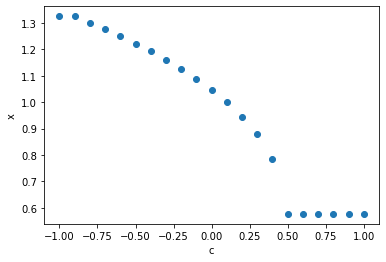

In [5]:
# Define a basic step function
def natural_param_step(xi, ci):
    c_next = ci + deltac
    xpolynomial = lambda x: polynomial(x, c=ci)
    x_next = fsolve(xpolynomial, xi)
    return x_next, c_next

# Do some steps
x_store = [x0]
c_store = [c0]

x = x0
c = c0
for i in range(20):
    x, c = natural_param_step(x, c)
    x_store += [x]
    c_store += [c]

# Plot
plt.scatter(c_store, x_store)
plt.xlabel("c")
plt.ylabel("x")
plt.show()

This shows a very basic natural parameter continuation for the polynomial $x^3 -x + c$. 
Note if we change `x0guess` above we get a different plot.

We now do the same but for pseudo-arclength continuation.

------------
Pseudo-arclength continuation


In [10]:
# Redefine polynomial in question, we keep x in array form
def polynomial(c: float, x: np.ndarray):
    return x[0]**3 - x[0] + c

# Setup
c0, x0guess = -1, np.array(([1]))
fixed_poly = lambda x: polynomial(c=c0,x=x)
x0 = fsolve(fixed_poly, x0guess)

deltac = 0.1
c1 = c0 + deltac
x1guess = x0
x1 = fsolve(fixed_poly, x0)

v0 = np.concatenate(([c0],x0))
v1 = np.concatenate(([c1],x))

# Initialise stores
vstore = np.stack((v0, v1))
v_last = v0
v_current = v1
num_steps = 10

# Define objective function
def objective(v: np.ndarray,):
    original = polynomial(c=v[0], x=v[1:])
    pseudo_arclength_eq = np.dot((v - v_next_guess),secant))
    
for i in range(num_steps):
    secant = v_current - v_last
    v_next_guess = v_current + secant



TODO: 
-solve $x^3 - x + c = 0$ on paper so we know what to look for

-look at paper notes in folder for review

-implement pseudo-arclength continuation, perhaps find nice way to plot search lines

-make and test framework that can take this and use it for the limit cycle shooting problem, or for equillibria finding. Look at dictionary vs array of parameters, choosing which param to vary etc.

-make functionality to do continuation backwards, and functionality to run continuation multiple times and add new points

-should reproduce some of the tools that XPPauto uses.

In [12]:
foo = np.array(([2,3,4]))
boo = np.array(([2,3,6]))
doo = np.stack((boo, foo))
print(doo)

[[2 3 6]
 [2 3 4]]
